In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression;  log=LogisticRegression();
from xgboost import XGBClassifier;  xgb=XGBClassifier(n_estimators=10);
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report, roc_curve,roc_auc_score, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

train = pd.read_csv('Final_version_cleaned.csv')
train.head(10)

,id,loanAmnt,term,interestRate,installment,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,...,n8,n9,n10,n11,n12,n13,n14,avg_GDP,avg_UNRATE,avg_CPIAUCSL
0,0,2.361518,5,19.52,1.835928,2.8,-0.672561,2.00,2,0.491187,...,12.0,2.0,7.0,0.0,0.0,0.0,2.0,19510.161857,4.638095,244.072190
1,1,0.411100,5,18.49,0.091610,3.8,1.387032,5.00,0,-0.437056,...,0.0,0.0,13.0,0.0,0.0,0.0,0.0,18605.830600,5.845000,237.282150
2,2,-0.277283,5,16.99,-0.534604,3.7,-0.378169,8.00,0,-0.030950,...,5.0,3.0,11.0,0.0,0.0,0.0,4.0,19923.215667,5.152381,249.167714
3,3,-0.392013,3,7.26,-0.370946,6.6,-0.235973,10.00,1,0.607217,...,21.0,6.0,9.0,0.0,0.0,0.0,1.0,19531.501000,4.500000,243.766583
4,4,-1.309857,3,12.99,-1.288447,4.8,-0.675057,8.26,1,-0.683621,...,15.0,7.0,12.0,0.0,0.0,0.0,4.0,19767.011667,4.333333,246.275333
5,5,-0.392013,3,7.99,-0.356833,6.5,-0.190254,7.00,0,-0.538583,...,3.0,2.0,19.0,0.0,0.0,0.0,0.0,20176.490615,4.761538,251.855462
6,6,-1.418851,3,7.69,-1.430419,6.6,1.013999,9.00,0,-0.596598,...,18.0,3.0,12.0,0.0,0.0,0.0,3.0,19131.816769,4.938462,240.102462
7,7,-0.334648,3,14.98,-0.150722,4.7,1.332372,1.00,1,-0.669117,...,21.0,4.0,8.0,0.0,0.0,0.0,2.0,18785.413615,5.407692,238.117231
8,8,-0.277283,3,12.99,-0.128806,4.8,-0.673800,5.00,2,-0.234003,...,17.0,11.0,15.0,0.0,0.0,0.0,6.0,19893.829917,4.216667,247.626917
9,9,-0.908300,3,10.99,-0.861193,5.6,-0.675057,7.21,1,-0.882323,...,39.0,5.0,7.0,0.0,0.0,0.0,8.0,19649.223333,4.400000,245.019833


In [2]:
xgb = XGBClassifier(n_estimators=10)
x_train, x_test, y_train, y_test = train_test_split(train.drop('isDefault', axis=1), train['isDefault'], test_size=0.3, random_state=42)

In [3]:
error = []
rsquared = []
# x = list(range(0.1.5,1))
for i in np.arange(0.015,0.02,0.001):
    model_xg_f = XGBClassifier(n_estimators=30,subsample=0.5,learning_rate=i)
    # Train the model on the training set
    model_xg_f.fit(x_train, y_train)
    # Make predictions on the valid set
    y_pred = model_xg_f.predict(x_test)
    resid = y_test - y_pred
    sse = np.sum(resid**2)
    Error = sse/len(y_pred)
    # calculate R^2 and adjusted R^2
    sst = np.sum((y_test - np.mean(y_test))**2)
    r_squared = 1 - (sse / sst)
    adjusted_r_squared = 1 - (sse / sst) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)
    error.append(Error)
    rsquared.append(r_squared)
    print(f'error:{Error}',i)
    print(f'r_squared:{r_squared}')

error:0.19887916666666666 0.015
r_squared:-0.24825114813100413
error:0.19887916666666666 0.016
r_squared:-0.24825114813100413
error:0.19887916666666666 0.017
r_squared:-0.24825114813100413
error:0.19887916666666666 0.018000000000000002
r_squared:-0.24825114813100413
error:0.19887916666666666 0.019000000000000003
r_squared:-0.24825114813100413
error:0.19887916666666666 0.020000000000000004
r_squared:-0.24825114813100413


In [12]:
for i in np.arange(30,100,10):
    model_xg_f = XGBClassifier(n_estimators=i,subsample=0.5,learning_rate=0.19)
    # Train the model on the training set
    model_xg_f.fit(x_train, y_train)
    # Make predictions on the valid set
    y_pred = model_xg_f.predict(x_test)
    resid = y_test - y_pred
    sse = np.sum(resid**2)
    Error = sse/len(y_pred)
    # calculate R^2 and adjusted R^2
    sst = np.sum((y_test - np.mean(y_test))**2)
    r_squared = 1 - (sse / sst)
    adjusted_r_squared = 1 - (sse / sst) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)
    error.append(Error)
    rsquared.append(r_squared)
    print(f'error:{Error}',i)
    print(f'r_squared:{r_squared}')

error:0.1934375 30
r_squared:-0.21409690875912668
error:0.19307083333333333 40
r_squared:-0.21179555112916848
error:0.19305 50
r_squared:-0.2116647921729209
error:0.19308333333333333 60
r_squared:-0.211874006502917
error:0.19329583333333333 70
r_squared:-0.21320774785664276
error:0.19324166666666667 80
r_squared:-0.21286777457039907
error:0.19321666666666668 90
r_squared:-0.21271086382290183


In [4]:
for i in np.arange(0.3,1,0.1):
    model_xg_f = XGBClassifier(n_estimators=70,subsample=i,learning_rate=0.19)
    # Train the model on the training set
    model_xg_f.fit(x_train, y_train)
    # Make predictions on the valid set
    y_pred = model_xg_f.predict(x_test)
    resid = y_test - y_pred
    sse = np.sum(resid**2)
    Error = sse/len(y_pred)
    # calculate R^2 and adjusted R^2
    sst = np.sum((y_test - np.mean(y_test))**2)
    r_squared = 1 - (sse / sst)
    adjusted_r_squared = 1 - (sse / sst) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)
    error.append(Error)
    rsquared.append(r_squared)
    print(f'error:{Error}',i)
    print(f'r_squared:{r_squared}')

error:0.19317916666666668 0.3
r_squared:-0.21247549770165608
error:0.19300833333333334 0.4
r_squared:-0.2114032742604257
error:0.19329583333333333 0.5
r_squared:-0.21320774785664276
error:0.192475 0.6000000000000001
r_squared:-0.20805584498048657
error:0.19257916666666666 0.7000000000000002
r_squared:-0.20870963976172474
error:0.1922875 0.8000000000000003
r_squared:-0.20687901437425804
error:0.19280833333333333 0.9000000000000001
r_squared:-0.21014798828044845


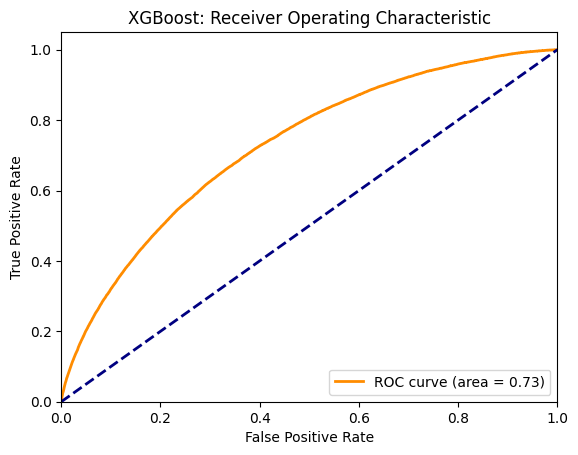

Confusion Matrix:
 [[126476   1382]
 [ 30015   2127]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.99      0.89    127858
           1       0.61      0.07      0.12     32142

    accuracy                           0.80    160000
   macro avg       0.71      0.53      0.50    160000
weighted avg       0.77      0.80      0.73    160000


ROC AUC Score: 0.73


In [5]:
# Splitting the data into features and target
X = train.drop('isDefault', axis=1)  
y = train['isDefault'] 

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and train the XGBoost classifier
xg_model = XGBClassifier(n_estimators=30, subsample=0.7, learning_rate=0.13)
xg_model.fit(X_train, y_train)


y_pred = xg_model.predict(X_test)
y_pred_proba = xg_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Calculating ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost: Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Printing the results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nROC AUC Score: {:.2f}".format(roc_auc))

isDefault
0    159610
1    159610
Name: count, dtype: int64


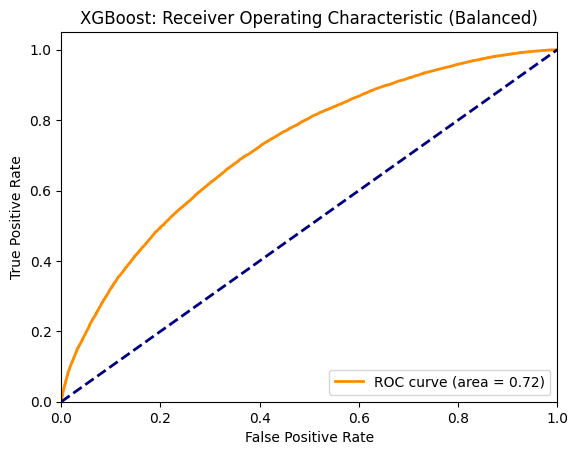

Confusion Matrix (Balanced):
 [[20802 11135]
 [10349 21558]]

Classification Report (Balanced):
               precision    recall  f1-score   support

           0       0.67      0.65      0.66     31937
           1       0.66      0.68      0.67     31907

    accuracy                           0.66     63844
   macro avg       0.66      0.66      0.66     63844
weighted avg       0.66      0.66      0.66     63844


ROC AUC Score (Balanced): 0.72


In [27]:
from sklearn.utils import resample


# Separating the majority and minority classes
train_majority = train[train['isDefault'] == 0]
train_minority = train[train['isDefault'] == 1]

# Downsample the majority class
train_majority_downsampled = resample(train_majority, 
                                   replace=False,    # sample without replacement
                                   n_samples=len(train_minority),  # to match minority class
                                   random_state=123) # reproducible results

# Combining the downsampled majority class with the minority class
train_balanced = pd.concat([train_majority_downsampled, train_minority])

# Displaying the new class counts
print(train_balanced['isDefault'].value_counts())

X_balanced = train_balanced.drop('isDefault', axis=1)
y_balanced = train_balanced['isDefault']

X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42)

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split


X_balanced = train_balanced.drop('isDefault', axis=1)
y_balanced = train_balanced['isDefault']

# Splitting the balanced dataset into training and testing sets
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42)

# Initialize and train the XGBoost classifier on the balanced dataset
xg_model_balanced = XGBClassifier(n_estimators=30, subsample=0.7, learning_rate=0.13)
xg_model_balanced.fit(X_train_balanced, y_train_balanced)

# Making predictions on the test set
y_pred_balanced = xg_model_balanced.predict(X_test_balanced)
y_pred_proba_balanced = xg_model_balanced.predict_proba(X_test_balanced)[:, 1]  # Probabilities for the positive class

# Evaluating the model
conf_matrix_balanced = confusion_matrix(y_test_balanced, y_pred_balanced)
class_report_balanced = classification_report(y_test_balanced, y_pred_balanced)

# Calculating ROC and AUC for the balanced dataset
fpr_balanced, tpr_balanced, thresholds_balanced = roc_curve(y_test_balanced, y_pred_proba_balanced)
roc_auc_balanced = auc(fpr_balanced, tpr_balanced)

# Plotting the ROC curve for the balanced dataset
plt.figure()
plt.plot(fpr_balanced, tpr_balanced, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_balanced)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost: Receiver Operating Characteristic (Balanced)')
plt.legend(loc="lower right")
plt.show()

# Printing the results for the balanced dataset
print("Confusion Matrix (Balanced):\n", conf_matrix_balanced)
print("\nClassification Report (Balanced):\n", class_report_balanced)
print("\nROC AUC Score (Balanced): {:.2f}".format(roc_auc_balanced))

In [28]:
train = pd.read_csv('Final_version_cleaned.csv')
train.head()

,id,loanAmnt,term,interestRate,installment,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,...,n8,n9,n10,n11,n12,n13,n14,avg_GDP,avg_UNRATE,avg_CPIAUCSL
0,0,2.361518,5,19.52,1.835928,2.8,-0.672561,2.00,2,0.491187,...,12.0,2.0,7.0,0.0,0.0,0.0,2.0,19510.161857,4.638095,244.072190
1,1,0.411100,5,18.49,0.091610,3.8,1.387032,5.00,0,-0.437056,...,0.0,0.0,13.0,0.0,0.0,0.0,0.0,18605.830600,5.845000,237.282150
2,2,-0.277283,5,16.99,-0.534604,3.7,-0.378169,8.00,0,-0.030950,...,5.0,3.0,11.0,0.0,0.0,0.0,4.0,19923.215667,5.152381,249.167714
3,3,-0.392013,3,7.26,-0.370946,6.6,-0.235973,10.00,1,0.607217,...,21.0,6.0,9.0,0.0,0.0,0.0,1.0,19531.501000,4.500000,243.766583
4,4,-1.309857,3,12.99,-1.288447,4.8,-0.675057,8.26,1,-0.683621,...,15.0,7.0,12.0,0.0,0.0,0.0,4.0,19767.011667,4.333333,246.275333


In [30]:
train.corr(numeric_only=False)["isDefault"].sort_values()

subGrade             -0.266415
ficoRangeLow         -0.130994
ficoRangeHigh        -0.130993
annualIncome         -0.042782
avg_UNRATE           -0.035857
employmentTitle      -0.030714
purpose              -0.029208
title                -0.025173
revolBal             -0.020929
employmentLength     -0.015391
totalAcc             -0.012756
initialListStatus    -0.007383
n5                   -0.006860
id                   -0.000351
n11                  -0.000295
regionCode            0.002822
n12                   0.003572
n8                    0.005403
postCode              0.007140
n13                   0.011021
n6                    0.012333
n0                    0.013164
applicationType       0.018197
delinquency_2years    0.020185
n4                    0.021352
pubRecBankruptcies    0.026042
pubRec                0.026558
openAcc               0.026867
n10                   0.034654
n7                    0.039918
earliesCreditLine     0.043096
n1                    0.047285
installm

In [6]:
# drop features range [-0.02,0.02]

columns_to_drop = ['employmentLength', 'totalAcc', 'initialListStatus', 'n5', 'id', 
                   'n11', 'regionCode', 'n12', 'n8', 'postCode', 'n13', 'n6', 'n0', 'applicationType']
train = train.drop(columns=columns_to_drop)
print(train.head())

   loanAmnt  term  interestRate  installment  subGrade  employmentTitle  \
0  2.361518     5         19.52     1.835928       2.8        -0.672561   
1  0.411100     5         18.49     0.091610       3.8         1.387032   
2 -0.277283     5         16.99    -0.534604       3.7        -0.378169   
3 -0.392013     3          7.26    -0.370946       6.6        -0.235973   
4 -1.309857     3         12.99    -1.288447       4.8        -0.675057   

   homeOwnership  annualIncome  verificationStatus  issueDate  ...   n2   n3  \
0              2      0.491187                   2      14.07  ...  2.0  2.0   
1              0     -0.437056                   2      12.08  ...  0.0  0.0   
2              0     -0.030950                   2      15.10  ...  3.0  3.0   
3              1      0.607217                   1      15.08  ...  6.0  6.0   
4              1     -0.683621                   2      16.03  ...  7.0  7.0   

     n4    n7   n9   n10  n14       avg_GDP  avg_UNRATE  avg_CPIAUCS

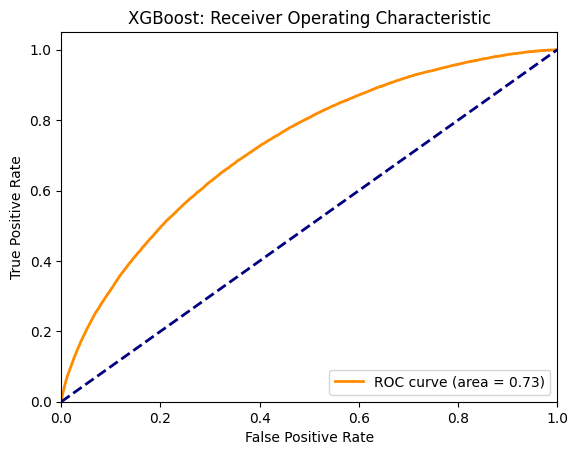

Confusion Matrix:
 [[126396   1462]
 [ 29932   2210]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.99      0.89    127858
           1       0.60      0.07      0.12     32142

    accuracy                           0.80    160000
   macro avg       0.71      0.53      0.51    160000
weighted avg       0.77      0.80      0.74    160000


ROC AUC Score: 0.73


In [8]:
# Splitting the data into features and target
X = train.drop('isDefault', axis=1)  
y = train['isDefault'] 

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and train the XGBoost classifier
xg_model = XGBClassifier(n_estimators=30, subsample=0.7, learning_rate=0.13)
xg_model.fit(X_train, y_train)


y_pred = xg_model.predict(X_test)
y_pred_proba = xg_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Calculating ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost: Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Printing the results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nROC AUC Score: {:.2f}".format(roc_auc))

In [ ]:
# results shown ROC AUC Score did not come up after removing the less correlated features

In [14]:
# Stress testing - Adding the unemployment five percentages overall
# Stress testing - GDP decreases 20% overall
train['avg_UNRATE'] = train['avg_UNRATE'] + 5
train['avg_GDP'] =  train['avg_GDP'] * 0.8

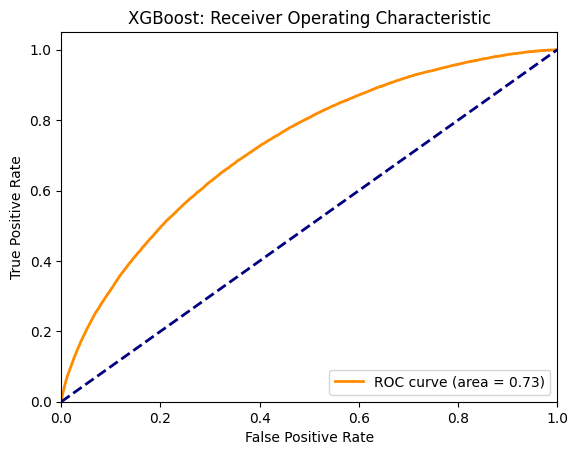

Confusion Matrix:
 [[126396   1462]
 [ 29932   2210]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.99      0.89    127858
           1       0.60      0.07      0.12     32142

    accuracy                           0.80    160000
   macro avg       0.71      0.53      0.51    160000
weighted avg       0.77      0.80      0.74    160000


ROC AUC Score: 0.73


In [15]:
# Splitting the data into features and target
X = train.drop('isDefault', axis=1)  
y = train['isDefault'] 

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and train the XGBoost classifier
xg_model = XGBClassifier(n_estimators=30, subsample=0.7, learning_rate=0.13)
xg_model.fit(X_train, y_train)


y_pred = xg_model.predict(X_test)
y_pred_proba = xg_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Calculating ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost: Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Printing the results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nROC AUC Score: {:.2f}".format(roc_auc))

In [ ]:
# performance is stable and pass the stress testing